<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

#### Read the dataset in the csv file from the URL


In [15]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [16]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


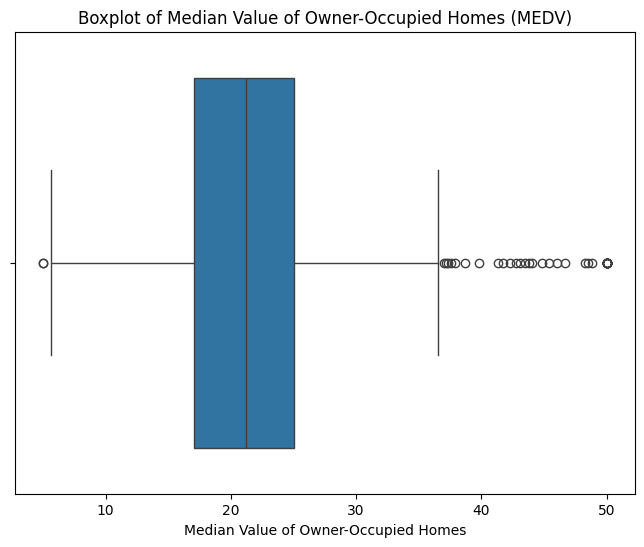

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Owner-Occupied Homes')
plt.show()

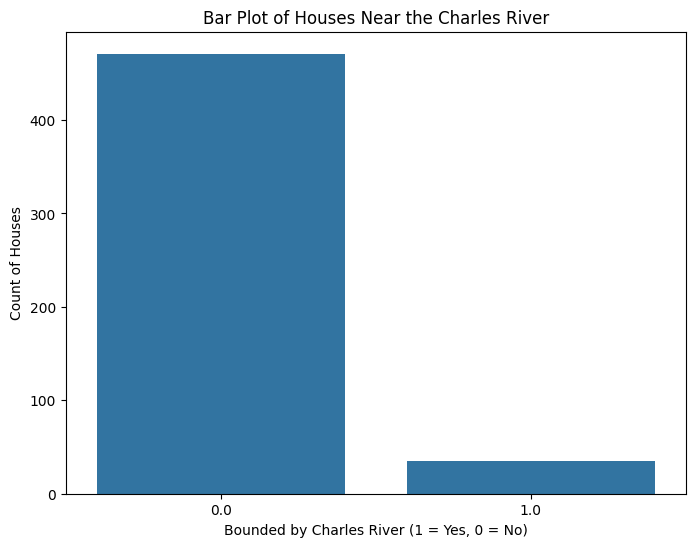

In [19]:
# Bar plot for Charles River (assuming the column is 'CHAS')
plt.figure(figsize=(8,6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Houses Near the Charles River')
plt.xlabel('Bounded by Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count of Houses')
plt.show()


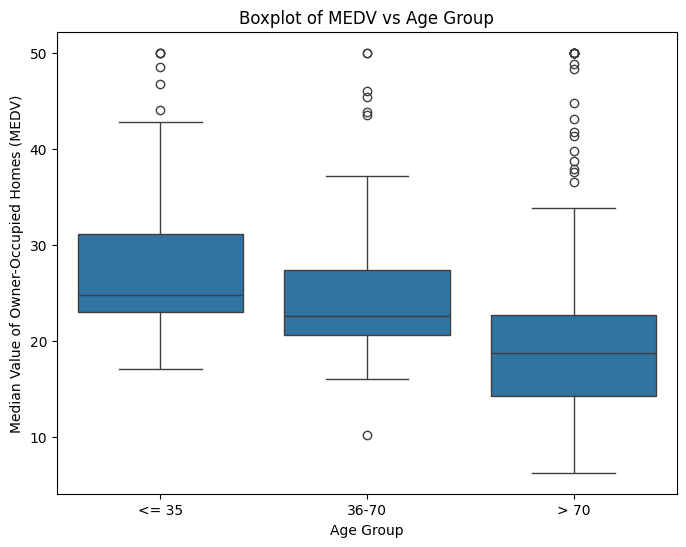

In [21]:
# Discretize the AGE variable into three categories
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['<= 35', '36-70', '> 70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Boxplot for MEDV vs AGE groups
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()


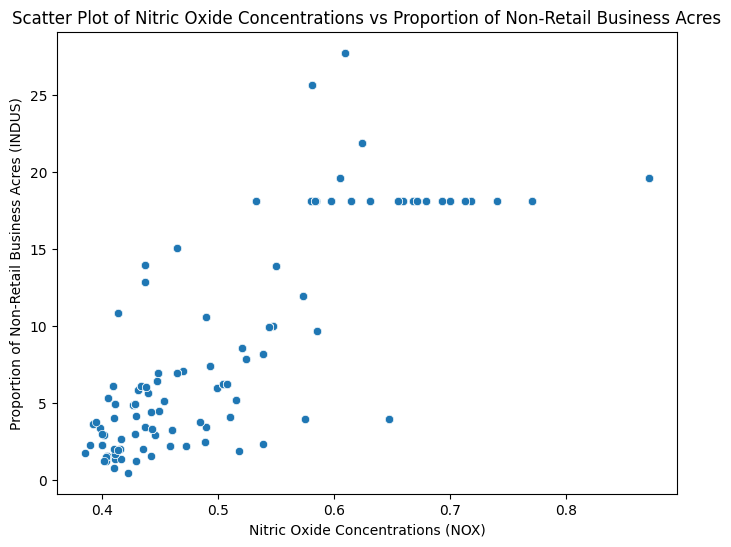

In [22]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()


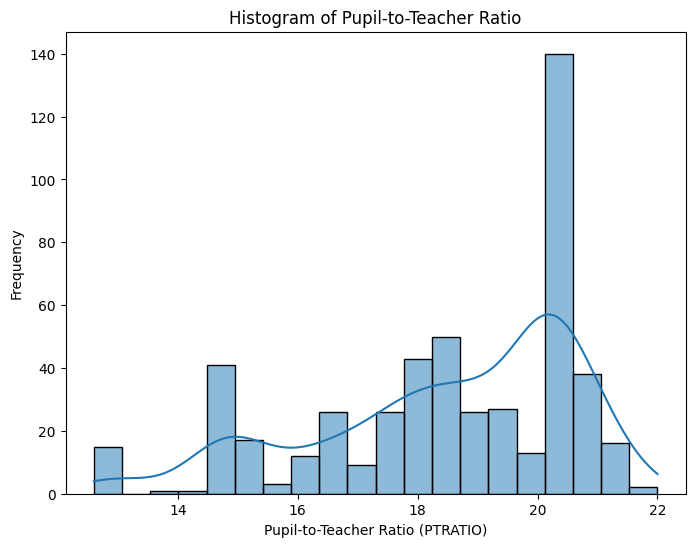

In [23]:
# Histogram for PTRATIO
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=20)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()


In [35]:
group0 = boston_df[boston_df['CHAS']==0]['MEDV']
group1 = boston_df[boston_df['CHAS']==1]['MEDV']

In [36]:
t_stat, p_value = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test (safer when variances are unequal)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -3.1133
P-value: 0.0036


In [39]:
model = ols(formula='MEDV ~ CHAS', data=boston_df)
results = model.fit()
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)

                sum_sq     df          F    PR(>F)
CHAS       1312.079271    1.0  15.971512  0.000074
Residual  41404.216144  504.0        NaN       NaN


In [43]:
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation Coefficient: 0.7637
P-value: 0.0000


In [44]:
x=boston_df['DIS']
y=boston_df['MEDV']

X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.21e-08
Time:                        08:57:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0